# Projet Data

## Sommaire

- <a href='#sectionIntro'>Introduction</a>
- <a href='#sectionVRP'>Le VRP</a>
- <a href='#sectionHeuristics'>Les heuristiques</a>
- <a href='#sectionSolution'>Solution</a>
    - <a href='#sectionInstanceGenration'>Génération d'instances</a>
    - <a href='#sectionAlgorithm'>Algorithme du recuit</a>
    - <a href='#sectionSolutionStats'>Etude de la solution</a>
- <a href='#sectionStats'>Statistiques</a>
- <a href='#sectionConclusion'>Conclusion</a>

<a id='sectionIntro'></a>
## Introduction

Ce Notebook a pour but d'expliquer notre démarche tout au long de ce projet Big Data. Dans le cadre de ce projet, nous avons été contacté par l'agence ADEME afin de proposer une solution qui permettrait d'optimiser la livraison de marchandises. Cette problématique est très importante car elle répond à un besoin de mettre en place des solutions plus économiques et moins polluantes pour le transport de marchndises et de personnes. Ces besoins font apparaitre de nouveaux défis quand à l'optimisation des ressources.


Pour répondre à cette problématique nous nous appierons sur l'algorithme du VRP. Dans un premier temps nous discuterons donc du VRP, de sa définition mathématique, et de comment il modélise notre problème et ainsi que de ses différentes variantes. Ensuite nous étudierons les heuristiques, leur utilité et les différents types d'heuristiques à notre disposition. Ensuite nous présenterons notre solution technique, et les résultats obtenus au travers de statistiques. Pour finir nous conclurons sur les résultats de notre algorithme et la manière dont ce dernier répond à notre problématique et à l'appel d'offre de ADEME.

<a id='sectionVRP'></a>
## Le VRP


Le VRP, ou Vehicule Routing Problem est un nom générique donné à une classe de problème de recherche opérationnelle et d'optimisation combinatoire. Le problème de base est formulé de la manière suivante : déterminer les différentes tournées d'une flotte de véhicules afin de livrer une liste de clients et de retourner à leur point de départ. Le but étant généralement de minimiser le coût des livraisons, mais on peut aussi choisir d'autres critères comme le temps où l'empreinte écologique.

![VRP](img/VRP.gif)


Ce problème est une extension du problème du voyageur de commerce (TSP) : il reprend le même principe mais ajoute plusieurs véhicules au lieu d'un seul pour le TSP. Cette contrainte fait place le VRP dans la catégorie NP-Hard.

Afin de résoudre le problème du VRP il faut le définir mathématiquement : 

![Démonstration mathématique](img/maths.png)

Aujourd'hui le VRP est un problème central dans les domaines des transports et de la logistique et il le sera encore pour les années futures. En effet optimiser ses livraisons est très important pour les entreprises des domaines cités précédemment car cela leur permet de réduire leurs coûts. De ce fait il existe de nombreuses variantes du VRP avec chacune des contraintes que l'on peut trouver dans des situations réelles :
- Capacited VRP (CVRP) : tous les véhicules ont une limite sur la quantité d'objets qu'ils peuvent transporter
- VRP with Time Window (VRPTM) : chaque client doit être livré dans une certaine plage horaire
- Multiple Depot VRP (MDVRP) : les véhicules peuvent partir de plusieurs dépôts
- VRP with Pick-Up and Delivering (VRPPD) : les clients peuvent renvoyer des éléments au passage des véhicules
- Split Delivery VRP (SDVRP) : un client peut être livré par plusieurs véhicules
- Stochastic VRP (SVRP) : on ajoute des valeurs aléatoires au problème (par exemple que les clients ont une probabilité p d'être présents)
- Periodic VRP (PVRP) : au lieu de faire les livraisons sur un seul jour, on peut livrer sur N jours

Pour ce projet nous avons décidés de choisir le problème du CVRP car il nous permet de remplir deux contraintes : utiliser k camions pour faire les livraisons et la prise en compte de la capacité des camions et de l'encombrement des objets.

<a id='sectionHeuristics'></a>
## Les heuristiques

Comme dit précédemment le problème du VRP est un problème NP-Hard, ce qui signifie que les ressources nécessaires pour le résoudre augmentent exponentiellement avec la taille de ses entrées. Pour résoudre ce problème dans un temps raisonnable nous allons donc utiliser des méthodes heuristiques. Les heuristiques sont des méthodes de calculs souvent utilisées pour résoudre des problèmes NP-Hard car elles permettent de trouver une solution assez proche de la solution optimale en un temps raisonnable. Il existe différents types d'heuristiques qui peuvent être comparées avec les critères suivants :
- Qualité du résultat
- Coût de l'heuristique (temps / mémoire)

Nous avons vu différents types d'heuristiques, chacune ayant des avantages et des inconvénients.

### Les algorithmes gloutons
Les algorithmes gloutons suivent le principe suivant : à chaque étape ils choisissent un optimum local. Ils ont en général un coût assez faible mais en général ils n'aboutissent pas à un optimal global, comme illustré dans l'exemple ci-dessous.

![Algorithme Glouton](img/greedy.png)
Ici on part du point A et on cherche à monter selon la plus forte pente. Avec ce type d'algorithme on atteint le point m qui est un maximum local mais pas global.


### La recherche Tabou
Le principe du Tabou est d'effectuer une recherche sur ses voisins, puis de prendre la valeur qui optimise la fonction objectif, tout en évitant les valeurs par lesquelles l'on est déjà passé. Cet algorithme permet de sortir d'un optimum local pour potentiellement trouver un minimum global. A chaque fois que l'on visite un nouveau point, on l'ajoute dans une file FIFO ce qui va permettre à l'algorithme de se souvenir des points qu'il a déjà traversé tout (dans la limite des n derniers points avec n la taille de la file).
C'est algorithme converge un peu plus lentement qu'un algorithme glouton mais il permet d'obtenir de meilleurs résultats.

### Le recuit simulé
Le recuit simulé se base sur la recherche tabou mais introduit une notion de température, plus la température est élevée, plus l'algorithme a de chance de prendre une solution de moins bonne qualité. L'algorithme se découpe en 3 phases :
- On choisit un point s au hasard sur la courbe à minimiser (pour avoir une valeur de départ) et on choisit un température T assez élevée.
- On fait une recherche sur les voisins de s. Si la nouvelle solution est meilleure alors on la garde, sinon on calcule la probabilité d'accepter une solution moins bonne à l'aide de la température T. Dans les deux on décrémente la température T.
- Quand la température a atteint un certain seuil décidé par l'utilisateur, le programme s'arrête.

L'exemple suivant montre la recherche d'un maximum sur une courbe avec la méthode du recuit simulé, avec en bleu l'optimum global à un instant t, en rouge la valeur de s, et en noir la valeur des voisins de s
![Recuit Simulé](img/recuit.gif)



### Les algorithmes génétiques
La dernière catégorie d'heuristiques que nous allons étudier sont les algorithmes génétiques. Ces derniers se basent sur le principe de la sélection naturelle afin de proposer une solution à un problème. Il existe une multitude de variantes d'algorithmes génétiques mais ils ont tous une base commune :
![Algorithme Génétique](img/genetic.jpg)

La première étape d'un algorithme génétique consiste à générer une population initiale d'individus (en se servant de valeurs aléatoires ou de valeurs par défaut). Ensuite les individus sont évalués par une fonction que l'on peut assimiler à une fonction objectif. Cette fonction va déterminer à quel point un individu est susceptible de se faire sélectionner pour servir de base à la prochaine population. Vient ensuite une étape de sélection qui va retenir des individus afin de les faire passer à la génération suivante (plus un individu a eu un bon score à sa fonction d'évaluation, plus il est susceptible d'être sélectionné). Ces deux étapes sont une reproduction du principe de sélection naturelle. Vient ensuite une étape de reproduction, dont le but va être de mélanger les caractéristiques des individus sélectionnés (échange de caractéristique, ajout / retrait de caractéristiques en fonction de valeurs aléatoires, ...) afin d'obtenir une nouvelle population. Cette étape peut être assimilé aux différentes mutations rencontrées dans le monde biologique.
Le programme s'arrête en fonction d'une condition qui peut être soit un nombre fixe d'itérations soit basée sur les caractéristiques de la population.

## Choix de l'algorithme
Pour ce projet notre choix s'est porté sur l'algorithme du recuit simulé. En effet il nous permet d'obtenir des solutions assez proches de la solution optimale dans un temps de calcul qui reste raisonnable pour notre projet. Les algorithmes gloutons et tabou donnant des solutions avec un écart très important par rapport à la solution optimale.

PARLER DE L4ALGO GENETIQUE

<a id='sectionSolution'></a>
## Solution

Comme dit précédemment notre solution s'appuie sur un algorithme de recuit simulé. Dans cette partie nous allons détaillées les différentes étapes de notre solution ainsi que tous les modules qui l'accompagne.

<a id='sectionInstanceGenration'></a>
### Génération d'instances
Afin de tester notre algorithme il nous a fallu un moyen de générer différents cas de tests pour notre programme. Nous avons donc créé un algorithme qui permet de générer des instances du problème du CVRP. La structure de donnée que nous avons utilisée est la suivante :

In [1]:
instance = {
    'trucksCount' : int,
    'trucksCapacity' : int,
    'nodes' : [int],
    'matrix' : [[int]]
}

La variable 'trucksCount' est un entier qui représente le nombre de comaions disponibles. La variables 'trucksCapacity' est un entier qui représente la capacité total d'un camion. La variable 'nodes' est une liste d'entiers qui contient le demande sur chaque node. L'unité utilisé pour représenter ce poids est la même que celle utilisée pour représenter la capacité des camions. Enfin la variable 'matrix' est un tableau à deux dimensions qui contient des entiers. Ces tableaux représentent une matrice de poids. Pour accéder à la distance entre un noeud i et un noeud j on accède à la case matrix[i][j].


Ci-dessous on peut voir un graphe pondéré suivit de sa représentation avec une matric des poids.

![Exemple de graphe](img/graph.png)

In [2]:
matrice = [
[ 0,50,20,30],
[50, 0,25,28],
[20,25, 0,45],
[30,28,45, 0]
]

## Installation
Ce Notebook Jupyter requiert des modules externes pour fonctionner, pour les installer tapez la commande ci-dessous dans l'invite de commande de Anaconda.

Le script une case en dessous permet d'importer ces différents modules, ce qui va nous permettre d'insérer des démonstrations dans les cellules suivantes.

In [3]:
conda install -c anaconda matplotlib numpy parse scipy

SyntaxError: invalid syntax (<ipython-input-3-405e7984f471>, line 1)

In [5]:
import sys
import csv

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import pylab

### Algorithme de génération de données aléatoires

L'algorithme ci-dessous permet de générer des instances du problème CVRP avec des valeurs aléatoires. On peut modifier les bornes inférieures et supérieures des valeurs générées à l'aide de constantes au de variables. L'algorithme utilise un système de log afin de garder une trace de tous les jeux de données qui ont été généré. L'aléatoire est généré à partir d'une seed qui peut être spécifiée par l'utilisateur ou générée aléatoirement si l'utilisateur ne spécifie aucune valeur. C'est cette seed qui est stockée dans le fichier de log. Pendant la génération on fait aussi attention à ne pas générer des cas impossibles (par exemple en mettant un poids trop grand pour le nombre de camions et leur capacité).

### Algorithme de génération à partir d'un fichier
Afin de faire des statistiques sur la qualité de notre solution, nous devons utiliser notre algorithme sur des cas de test dont la solution optimale est connue, puis comparer cette solution avec celle de notre algorithme. Le programme suivant permet de créer une instance du problème à partir d'un fichier dont le nom est passé en paramètre.<br/><br/>
Ces fichiers ont le format suivant :<br/>
NAME : string - le nom du cas de test<br/>
COMMENT : (Augerat et al, No of trucks: int - nombre de camions, Optimal value: int - optimum global)<br/>
TYPE : CVRP - Non utilisé (tous nos cas de tests sont en CVRP)<br/>
DIMENSION : int - nombre de noeuds du graphe<br/>
EDGE_WEIGHT_TYPE : EUC_2D (non utilisé) <br/>
CAPACITY : int (capacité de chaque camion)<br/>
NODE_COORD_SECTION <br/>
 id x y (répété n fois en fonction du nombre de noeuds du graphe)<br/>
DEMAND_SECTION <br/>
id demand (répété n fois en fonction du nombre de noeuds du graphe<br/>
DEPOT_SECTION <br/>
 id (id du noeud qui représente le dépot)

<a id='sectionAlgorithm'></a>
### Partie Nico
Nico va faire la partie sur sa solution

Notre solution, comment elle fonctionne

<a id='sectionSolutionStats'></a>
### Performance de l'algorithme
Etude du niveau de complexité + stats

Prog stats + automatisation récolte des stats

Analyse de la solution niveau complexité

<a id='sectionStats'></a>
## Statistiques

Pour chaque instance de CVRP que notre algorithme resoud, il stocke le résultat dans un fichier CSV. Chaque entrée contient des informations qui permettent de faire des statistiques sur notre algorithme. On y retrouve le temps d'exécution, le résultat trouvé par notre algorithme et le résultat optimal (si le jeu de données est connu), et les paramètres du recuit (nombre d'itérations, tempérture de départ, ...).

Nous avons décidés d'effectuer deux séries de tests statistiques. La première série utilise des dataset générés aléatoirement par notre algorithme de génération, en controlant uniquement un paramètre (par exemple le nombre de villes ou le nombre de camions). Cette série statistique a pour but de mesurer les performances de notre programme face a une montée en charge assez importante (plusieurs miliers de villes). Ces statistiques ont pour but de montrer comment les changements sur les paramètres du dataset influent sur le temps d'exécution.

La deuxième série utilise des dataset connus. Cela va nous permettre de comparer la solution trouvée par notre algorithme à la solution optimale connue. Les paramètres qui seront changés seront ceux de notre algorithme de résolution, comme par exemple la température de base, le coefficient de recul de la température ou encore le nomre d'itértions. Cette deuxième série de statistiques aura donc pour but de montrer comment les différents paramètres du notre algorithme affecte la qualité de nos solutions.

Toutes les séries statstiques et les graohiques ci-dessous ont été réalisé en ne faisait varier qu'un seul paramètre à la fois, ce qui nous a permis de conclure sur la corréalétion ou sur la non corrélation entre la qualité de la solution / la vitesse de calcul et le paramètre en question.

Nb of cities / Time (s) : Y(x) = 0.30118085969480357x + -80.35110548965912
Nb of trucks / Time (s) : Y(x) = 0.2727722722551097x + 1.705345444921135
Temperature / Quality Coef : Y(x) = -0.0006997264815788038x + 0.509557305436477
Coef / Quality Coef : Y(x) = 0.38033823737106226x + 0.1451847789989137
Iterations / Quality Coef : Y(x) = 1.3136492824998165e-07x + 0.44701966559504547


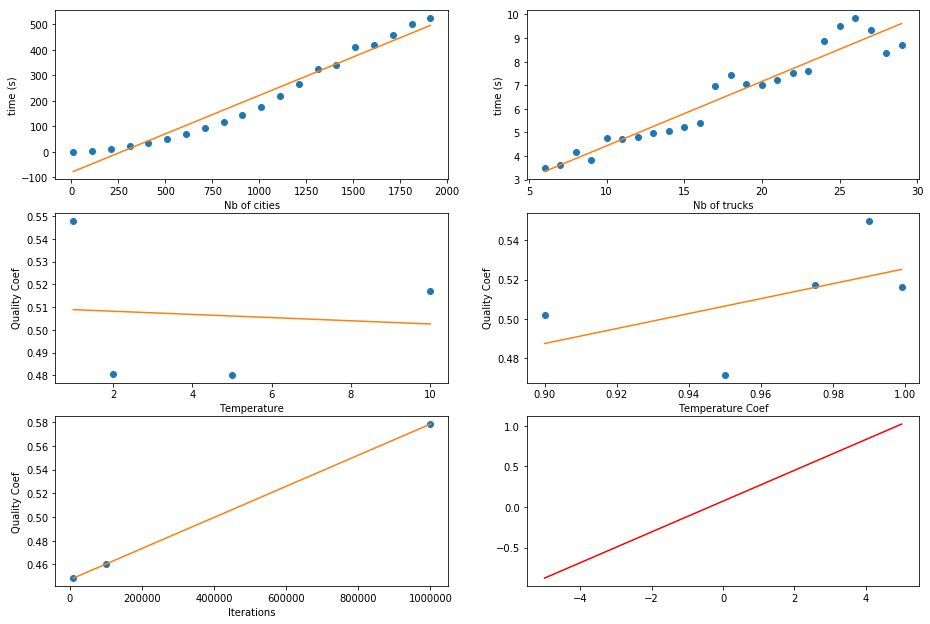

In [6]:
def calculateLinearRegression(xvalues, yvalues, xaxistitle, yaxistitle, windowTitle):
    xvalues = np.array(xvalues)

    slope, intercept, r_value, p_value, std_err = stats.linregress(xvalues, yvalues)
    line = slope * xvalues + intercept

    print('{0} : Y(x) = {1}x + {2}'.format(windowTitle, slope, intercept))

    plt.plot(xvalues, yvalues, 'o', xvalues, line)
    plt.xlabel(xaxistitle)
    plt.ylabel(yaxistitle)

    return slope, intercept


def retrieveStatsFromFile(fileName):
    data = [[]]

    file = open(fileName, "rt")
    try:
        reader = csv.reader(file)
        next(reader)
        data = list(reader)
    finally:
        file.close()
    return data

def main():
    RESULTS_DIRECTORY = 'Stats/Results/'
    
    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'cities.csv')
    plt.subplot(321)
    calculateLinearRegression([int(x[4]) for x in data], [float(x[0]) for x in data], 'Nb of cities', 'time (s)', 'Nb of cities / Time (s)')

    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'trucks.csv')
    plt.subplot(322)
    calculateLinearRegression([int(x[5]) for x in data], [float(x[0]) for x in data], 'Nb of trucks', 'time (s)', 'Nb of trucks / Time (s)')

    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'temperature.csv')
    plt.subplot(323)
    margeOptimum = [float(x[2]) - int(x[3]) for x in data]
    margeResult = [float(x[2]) - int(x[1]) for x in data]
    qualityCoef = [margeResult[i] / margeOptimum[i] for i in range(0, len(data))]
    coefSlope, coefIntercept = calculateLinearRegression([int(x[7]) for x in data], qualityCoef, 'Temperature', 'Quality Coef', 'Temperature / Quality Coef')

    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'coef.csv')
    plt.subplot(324)
    margeOptimum = [float(x[2]) - int(x[3]) for x in data]
    margeResult = [float(x[2]) - int(x[1]) for x in data]
    qualityCoef = [margeResult[i] / margeOptimum[i] for i in range(0, len(data))]
    temperatureSlope, temperatureIntercept = calculateLinearRegression([float(x[8]) for x in data], qualityCoef, 'Temperature Coef', 'Quality Coef', 'Coef / Quality Coef')

    data = retrieveStatsFromFile(RESULTS_DIRECTORY + 'iterations.csv')
    plt.subplot(325)
    margeOptimum = [float(x[2]) - int(x[3]) for x in data]
    margeResult = [float(x[2]) - int(x[1]) for x in data]
    qualityCoef = [margeResult[i] / margeOptimum[i] for i in range(0, len(data))]
    calculateLinearRegression([int(x[6]) for x in data], qualityCoef, 'Iterations', 'Quality Coef', 'Iterations / Quality Coef')

    plt.subplot(326)
    x = np.linspace(-5, 5, 100)
    y = (temperatureSlope + coefSlope) / 2 * x + (temperatureIntercept + coefSlope) / 2
    plt.plot(x, y, '-r') 

    plt.subplots_adjust(bottom=8, top=10, left=3, right=5)
    plt.show()

main()

<a id='sectionConclusion'></a>
## Conclusion